# Investigación Corta 2

## Pre-procesamiento de los datos

El pre-procesado es la primera etapa en el aprendizaje automatizado (Machine Learning). Se le aplica a todos los set de datos que se decean procesar y analisar.

Primero que todo se importan las librerías necesarias.

In [1]:
# Librería para el majeno de set de datos
import pandas as pd
# Librería numérica
import numpy as np
# Librería para graficar
import matplotlib.pyplot as plt
# Librería para contar el números de elementos de una clase
from collections import Counter
# Librería para el balanceo de datos usando sobre muestreo
from imblearn.over_sampling import ADASYN
# Librería para estandarizar datos
from sklearn.preprocessing import StandardScaler
# Librería para dividir el dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split
# Librerías para los distintos tipose de modelos de aprendizaje automatizado
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# Librería para las métricas de evaluación
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

Posteriormente se cargar el *dataset*.

In [2]:
filename = "hcvdat0.csv"
df = pd.read_csv(filename,engine="python",delimiter='\,')
df.head()

,"""""","""Category""","""Age""","""Sex""","""ALB""","""ALP""","""ALT""","""AST""","""BIL""","""CHE""","""CHOL""","""CREA""","""GGT""","""PROT"""
0,"""1""","""0=Blood Donor""",32,"""m""",38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,"""2""","""0=Blood Donor""",32,"""m""",38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,"""3""","""0=Blood Donor""",32,"""m""",46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,"""4""","""0=Blood Donor""",32,"""m""",43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,"""5""","""0=Blood Donor""",32,"""m""",39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


Mejorar un poco los nombres de las columnas

In [3]:
for label in df.columns:
    df.rename({label:label[1:len(label)-1]},axis=1,inplace=True)
df

,,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,"""1""","""0=Blood Donor""",32,"""m""",38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,"""2""","""0=Blood Donor""",32,"""m""",38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,"""3""","""0=Blood Donor""",32,"""m""",46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,"""4""","""0=Blood Donor""",32,"""m""",43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,"""5""","""0=Blood Donor""",32,"""m""",39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,"""611""","""3=Cirrhosis""",62,"""f""",32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,"""612""","""3=Cirrhosis""",64,"""f""",24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,"""613""","""3=Cirrhosis""",64,"""f""",29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,"""614""","""3=Cirrhosis""",46,"""f""",33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


La primera columna no aporta nada. Así que se puede eliminar.

In [4]:
del df[""]
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,"""0=Blood Donor""",32,"""m""",38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,"""0=Blood Donor""",32,"""m""",38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,"""0=Blood Donor""",32,"""m""",46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,"""0=Blood Donor""",32,"""m""",43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,"""0=Blood Donor""",32,"""m""",39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,"""3=Cirrhosis""",62,"""f""",32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,"""3=Cirrhosis""",64,"""f""",24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,"""3=Cirrhosis""",64,"""f""",29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,"""3=Cirrhosis""",46,"""f""",33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


Información del dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


De la información obtenida se puede observar que la columnas **ALB**, **ALP**, **ALT**, **CHOL** y **PROT** presentan datos faltantes.

### Outliers

Antes de rellenar los valores faltantes. Es importante encontrar los *outliers* o valores fuera del rango normal.
Para dicha labor se usará la siguiente función:

In [6]:
def detect_outliers(data_1,threshold=3):
    outliers=[[],[]]
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    for idx,y in enumerate(data_1):
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers[0].append(y)
            outliers[1].append(idx)
    return outliers

Para saber cuales valores estan fuera del rango habitual se colsulto la enciclopedia de la universidad de Rochester [2]. Se encontraron los siguientes rangos:

* **ALB**: *Albumin* (34 - 54 g/L).
* **ALP**: *Alkaline phosphatase* (44 - 147 U/L)
* **ALT**: *Alanine-amino-transferas* (menos de 44 - 1000 IU/L)
* **AST**: *Aspartate amino-transferase* (9 - 40 units/L)
* **BIL**: *Bilirubin* (10 - 25 mg/L)
* **CHE**: *Cholinesterase* ¡No se encontro un rango claro con el cual trabajar!
* **CHOL**: *Cholesterol* ¡No se encontro un rango claro con el cual trabajar!
* **CREA**: *Creatinine* (9 - 13 mg/L)
* **GGT**: *$\gamma$-glutamyl-transferase* (5 - 61 IU/L) [x7 para recien nacidos].
* **PROT**: *Proteina* (36 - 52 g/L)

In [7]:
strings = ["ALB outliers:","ALP outliers:","ALT outliers:","AST outliers:","BIL outliers:",
           "CHE outliers:","CHOL outliers:","CREA outliers:","GGT outliers:","PROT outliers:"]
thresholds = [4,3,10,3,3,8,8,2,3,6]

delete_idx = []

for i,string in enumerate(strings):
    data_1 = df[df.columns[3+i]]
    outlier = detect_outliers(data_1,thresholds[i])
    print(string,outlier[0])
    for idx in outlier[1]:
        if idx not in delete_idx:
            delete_idx.append(idx)
            
df.drop(index=delete_idx,inplace=True)

ALB outliers: [82.2, 14.9]
ALP outliers: [208.2, 190.7, 416.6]
ALT outliers: [325.3]
AST outliers: [188.7, 146.6, 164.2, 187.7, 324.0, 187.9, 161.9, 263.1, 185.0, 319.8, 181.8, 143.2, 150.0, 285.8]
BIL outliers: [200.0, 254.0, 91.0, 119.0, 209.0, 117.0, 200.0]
CHE outliers: []
CHOL outliers: []
CREA outliers: [519.0, 1079.1, 485.9]
GGT outliers: [239.0, 345.6, 218.3, 295.6, 392.2, 491.0, 399.5, 273.7, 400.3, 650.9]
PROT outliers: []


 ### Valores faltantes
 
 Como se había encontrado anteriormente en las columnas **ALB**, **ALP**, **ALT**, **CHOL** y **PROT** hay datos faltantes.

In [8]:
change = True
label="ALB";df[label].fillna(df[label].mean(),inplace=change)
label="ALP";df[label].fillna(df[label].mean(),inplace=change)
label="ALT";df[label].fillna(df[label].mean(),inplace=change)
label="CHOL";df[label].fillna(df[label].mean(),inplace=change)
label="PROT";df[label].fillna(df[label].mean(),inplace=change)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  584 non-null    object 
 1   Age       584 non-null    int64  
 2   Sex       584 non-null    object 
 3   ALB       584 non-null    float64
 4   ALP       584 non-null    float64
 5   ALT       584 non-null    float64
 6   AST       584 non-null    float64
 7   BIL       584 non-null    float64
 8   CHE       584 non-null    float64
 9   CHOL      584 non-null    float64
 10  CREA      584 non-null    float64
 11  GGT       584 non-null    float64
 12  PROT      584 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 63.9+ KB


### EDA

Descripción estadística del *dataset*

In [9]:
df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,47.214041,41.971698,66.755908,28.199828,29.891096,9.134075,8.341986,5.416817,78.200856,32.490240,72.293493
std,9.955152,5.031527,19.031352,22.498895,16.953166,6.810452,2.045323,1.090034,15.091060,28.900144,5.027508
min,19.000000,21.600000,11.300000,1.300000,10.600000,0.800000,1.540000,2.400000,8.000000,4.500000,44.800000
25%,39.000000,39.000000,53.225000,16.600000,21.375000,5.200000,7.057500,4.650000,68.000000,15.400000,69.600000
50%,47.000000,42.050000,66.350000,23.000000,25.550000,7.100000,8.355000,5.350000,76.850000,22.700000,72.300000
75%,54.000000,45.300000,78.200000,32.925000,31.325000,10.825000,9.640000,6.080000,88.000000,36.100000,75.400000
max,77.000000,62.900000,137.200000,258.000000,132.800000,59.100000,16.410000,9.670000,158.200000,203.000000,90.000000


Visualización de los datos.

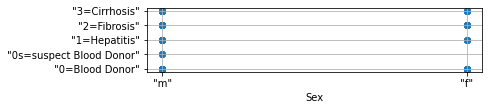

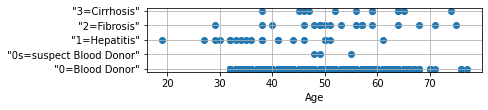

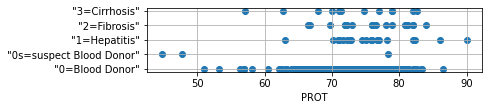

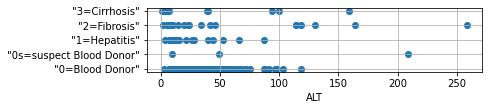

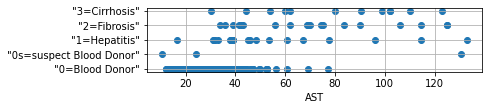

In [10]:
label = "Sex"
plt.subplot(3,1,1)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = "Age"
plt.subplot(3,1,2)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = 'PROT'
plt.subplot(3,1,1)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = 'ALT'
plt.subplot(3,1,2)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = 'AST'
plt.subplot(3,1,3)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

 Observando las gráficas se pueden tener algunas conclusiones preliminares. Como por ejemplo, pareciera no haber relación entre la categorización y el sexo. Por otro lado pareciera haber una relación entre el **ALT** y el **AST**. Además de una vaga relación entre la edad y **PROT**. 

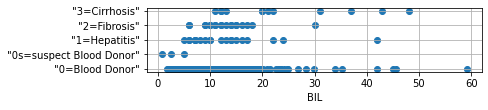

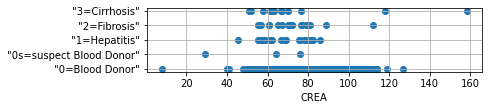

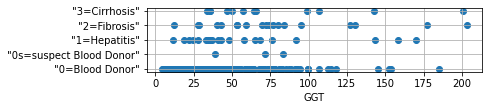

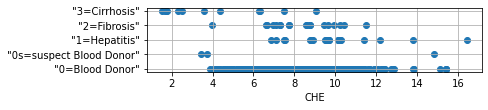

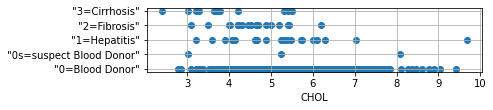

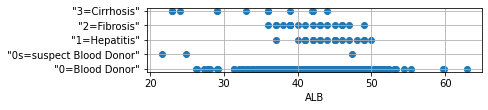

In [11]:
label = 'BIL'
plt.subplot(3,1,1)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = 'CREA'
plt.subplot(3,1,2)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = 'GGT'
plt.subplot(3,1,3)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = 'CHE'
plt.subplot(3,1,1)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = 'CHOL'
plt.subplot(3,1,2)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

label = 'ALB'
plt.subplot(3,1,3)
plt.scatter(df[label],df['Category'])
plt.xlabel(label)
plt.grid()
plt.show()

### Transformación

Se sustituye ***m*** por *uno* y ***f*** por *cero*.

In [12]:
df.replace(to_replace="m",value=1,regex=True,inplace=True)
df.replace(to_replace="f",value=0,regex=True,inplace=True)
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,"""0=Blood Donor""",32,1,38.5,52.500000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,"""0=Blood Donor""",32,1,38.5,70.300000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,"""0=Blood Donor""",32,1,46.9,74.700000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,"""0=Blood Donor""",32,1,43.2,52.000000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,"""0=Blood Donor""",32,1,39.2,74.100000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,"""3=Cirrhosis""",52,0,39.0,37.000000,1.3,30.4,21.0,6.33,3.78,158.2,142.5,82.7
611,"""3=Cirrhosis""",64,0,24.0,102.800000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,"""3=Cirrhosis""",64,0,29.0,87.300000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,"""3=Cirrhosis""",46,0,33.0,66.755908,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


Para transformar la columna **Category** se puede realizar una transformación como la hecha anteriormente.

In [13]:
aux = df.copy()
df.replace(to_replace="0=Blood Donor",value=0,regex=True,inplace=True)
df.replace(to_replace="0s=suspect Blood Donor",value=1,regex=True,inplace=True)
df.replace(to_replace="1=Hepatitis",value=2,regex=True,inplace=True)
df.replace(to_replace="2=Fibrosis",value=3,regex=True,inplace=True)
df.replace(to_replace="3=Cirrhosis",value=4,regex=True,inplace=True)
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,1,38.5,52.500000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,1,38.5,70.300000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,1,46.9,74.700000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,1,43.2,52.000000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,1,39.2,74.100000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,4,52,0,39.0,37.000000,1.3,30.4,21.0,6.33,3.78,158.2,142.5,82.7
611,4,64,0,24.0,102.800000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,4,64,0,29.0,87.300000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,4,46,0,33.0,66.755908,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


Separar en features y target

In [14]:
y = df['Category']
x = df.copy()
del x['Category']
del x['Sex']

### Balanceado de datos

Contar el número de muestras por clase.

In [15]:
counter = Counter(y)
print(counter)

Counter({0: 530, 2: 20, 3: 19, 4: 12, 1: 3})


### ADASYN

Algoritmo para el balanceo de datos usando el k-ésimo vecino más cercano. [3]

$\textbf{Paso 1}$: Calcular el radio, minoría a mayoría.
$$d = \frac{\text{clase minoritaria}}{\text{clase mayoritaria}}$$

$\textbf{Paso 2}$: Calcular el número total de la minoria sintética a generar.

$$G = (\text{clase mayoritaria} - \text{clase minoritaria}) \cdot \beta$$

$\textbf{Paso 3}$: Encontrar los k-ésimos vecinos de cada muestra minoritaria y calcular el valor $r_{i}$. El valor $r_{i}$ indica la dominancia de la clase mayoritaria.

$$r_{i} = \frac{\text{número de la mayoría}}{k}$$

$\textbf{Paso 4}$: Normalizar los valores $r_{i}$

$$\hat{r_{i}} = \frac{r_{i}}{\sum r_{i}}$$

$\textbf{Paso 5}$: Calcular la cantidad de muestras sintéticas a generar por vecino.

$$G_{i} = G \cdot \hat{r_{i}}$$

$\textbf{Paso 6}$: Generar $G_{i}$ para cada vecino.

$$s_{i} = x_{i} + (x_{zi} - x_{i}) \cdot \lambda$$

In [16]:
oversample = ADASYN(n_neighbors=2)
x,y = oversample.fit_resample(x,y)
counter = Counter(y)
print(counter)

Counter({2: 532, 1: 531, 0: 530, 3: 530, 4: 529})


### Estandarización

In [17]:
x = StandardScaler().fit_transform(x)
x_std = pd.DataFrame(x)

Separar en datos de entrenamiento y de prueba

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x_std,y,test_size=0.20,random_state=1234)

## Aprendizaje

### LogisticRegression

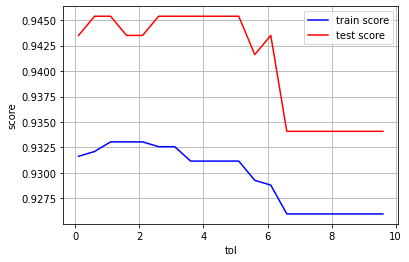

In [19]:
train_score = []
test_score = []
Tol = []

for i in range(1,100,5):
    Tol.append(i*0.1)
    clf = LogisticRegression(tol=i*0.1,max_iter=100)
    clf.fit(x_train,y_train)
    prediction =clf.predict(x_test)
    train_score.append(clf.score(x_train,y_train))
    test_score.append(clf.score(x_test,y_test))
    
plt.plot(Tol,train_score,'b',Tol,test_score,'r')
plt.grid()
plt.xlabel("tol")
plt.ylabel("score")
plt.legend(["train score","test score"])
plt.show()

In [20]:
clf = LogisticRegression(tol=4,max_iter=100)
clf.fit(x_train,y_train)
LogisticRegression_prediction =clf.predict(x_test)
train_score = clf.score(x_train,y_train)
test_score = clf.score(x_test,y_test)
print("train_score:",train_score)
print("test_score:",test_score)

train_score: 0.9311645450259312
test_score: 0.9453860640301318


### SVM

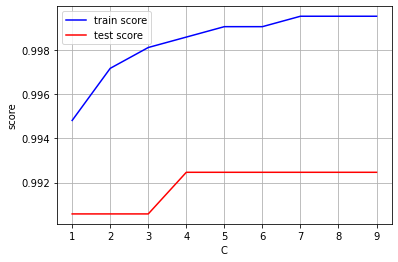

In [21]:
train_score = []
test_score = []
C = []

for c in range(1,10,1):
    C.append(c)
    clf = svm.SVC(C=c)
    clf.fit(x_train,y_train)
    prediction =clf.predict(x_test)
    train_score.append(clf.score(x_train,y_train))
    test_score.append(clf.score(x_test,y_test))
    
plt.plot(C,train_score,'b',C,test_score,'r')
plt.grid()
plt.xlabel("C")
plt.ylabel("score")
plt.legend(["train score","test score"])
plt.show()

In [22]:
clf = svm.SVC(C=4)
clf.fit(x_train,y_train)
SVM_prediction =clf.predict(x_test)
train_score = clf.score(x_train,y_train)
test_score = clf.score(x_test,y_test)
print("train_score:",train_score)
print("test_score:",test_score)

train_score: 0.9985855728429985
test_score: 0.992467043314501


### kNN

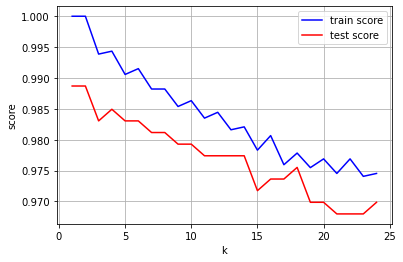

In [23]:
train_score = []
test_score = []
k_neighbors = []

for k in range(1,25):
    k_neighbors.append(k)
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train,y_train)
    prediction =clf.predict(x_test)
    train_score.append(clf.score(x_train,y_train))
    test_score.append(clf.score(x_test,y_test))
    
plt.plot(k_neighbors,train_score,'b',k_neighbors,test_score,'r')
plt.grid()
plt.xlabel("k")
plt.ylabel("score")
plt.legend(["train score","test score"])
plt.show()

In [24]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train,y_train)
kNN_prediction =clf.predict(x_test)
train_score = clf.score(x_train,y_train)
test_score = clf.score(x_test,y_test)
print("train_score:",train_score)
print("test_score:",test_score)

train_score: 0.9938708156529938
test_score: 0.9830508474576272


### Naïve Bayes

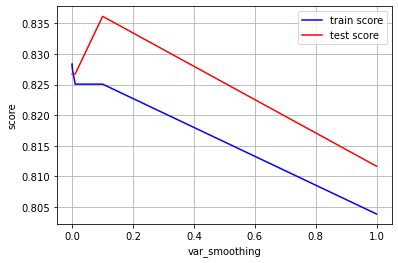

In [25]:
Var_Smoothing = []
train_score = []
test_score = []

for vs in range(0,10):
    Var_Smoothing.append(10**-vs)
    clf = GaussianNB(var_smoothing=10**-vs)
    clf.fit(x_train,y_train)
    NaiveBayes_prediction =clf.predict(x_test)
    train_score.append(clf.score(x_train,y_train))
    test_score.append(clf.score(x_test,y_test))

plt.plot(Var_Smoothing,train_score,'b',Var_Smoothing,test_score,'r')
plt.grid()
plt.xlabel("var_smoothing")
plt.ylabel("score")
plt.legend(["train score","test score"])
plt.show()

In [26]:
clf = GaussianNB(var_smoothing=1)
clf.fit(x_train,y_train)
NaiveBayes_prediction =clf.predict(x_test)
train_score = clf.score(x_train,y_train)
test_score = clf.score(x_test,y_test)
print("train_score:",train_score)
print("test_score:",test_score)

train_score: 0.8038661008958039
test_score: 0.8116760828625236


### LDA

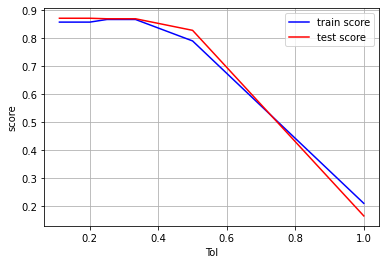

In [27]:
Tol = []
train_score = []
test_score = []

for t in range(1,10):
    Tol.append(1/t)
    clf = LDA(tol=1/t)
    clf.fit(x_train,y_train)
    LDA_prediction =clf.predict(x_test)
    train_score.append(clf.score(x_train,y_train))
    test_score.append(clf.score(x_test,y_test))

plt.plot(Tol,train_score,'b',Tol,test_score,'r')
plt.grid()
plt.xlabel("Tol")
plt.ylabel("score")
plt.legend(["train score","test score"])
plt.show()

In [28]:
clf = LDA(tol=0.1)
clf.fit(x_train,y_train)
LDA_prediction =clf.predict(x_test)
train_score = clf.score(x_train,y_train)
test_score = clf.score(x_test,y_test)
print("train_score:",train_score)
print("test_score:",test_score)

train_score: 0.858085808580858
test_score: 0.871939736346516


## Métricas de evaluación

### Accuracy

$$\text{Accuracy} = \frac{\text{Número de casos correctas}}{\text{Total de casos}}$$

Es el método más sencillo para evaluar el rendimiento.

No es bueno ante datos no balanceados

In [29]:
print("| Logistic Regression Accuracy |",accuracy_score(y_test,LogisticRegression_prediction),"|")
print("| SVM Accuracy                 |",accuracy_score(y_test,SVM_prediction)," |")
print("| kNN Accuracy                 |",accuracy_score(y_test,kNN_prediction),"|")
print("| Naive Bayes Accuracy         |",accuracy_score(y_test,NaiveBayes_prediction),"|")
print("| LDA Accuracy                 |",accuracy_score(y_test,LDA_prediction),"|")

| Logistic Regression Accuracy | 0.935969868173258 |
| SVM Accuracy                 | 0.992467043314501  |
| kNN Accuracy                 | 0.9830508474576272 |
| Naive Bayes Accuracy         | 0.8116760828625236 |
| LDA Accuracy                 | 0.871939736346516 |


### Recall

$$\text{Recall} = \frac{\text{Positivos verdaderos}}{\text{Positivos verdaderos + Negativos falsos}}$$

Recall: es la sensivilidad. Los casos positivos identificados como correctos entre los casos positivos reales. En otras palabras, la habilidad del modelo de encontrar loas casos relevantes.

Se usa más que todo con datos no balanceados.


In [30]:
print("| Logistic Regression Accuracy |",recall_score(y_test,LogisticRegression_prediction,average='macro'),"|")
print("| SVM Accuracy                 |",recall_score(y_test,SVM_prediction,average='macro')," |")
print("| kNN Accuracy                 |",recall_score(y_test,kNN_prediction,average='macro'),"|")
print("| Naive Bayes Accuracy         |",recall_score(y_test,NaiveBayes_prediction,average='macro'),"|")
print("| LDA Accuracy                 |",recall_score(y_test,LDA_prediction,average='macro'),"|")

| Logistic Regression Accuracy | 0.9350086240237045 |
| SVM Accuracy                 | 0.9932203389830508  |
| kNN Accuracy                 | 0.9847457627118643 |
| Naive Bayes Accuracy         | 0.8163936497949187 |
| LDA Accuracy                 | 0.870499632586242 |


### Precision

$$\text{Precision} = \frac{\text{Positivos verdaderos}}{\text{Positivos verdaderos} + \text{Negativos verdaderos}}$$

Precision: Que tan cerca estan las medidas entre sí. Sin importar que estén cerca o lejos del valor deceado.

In [31]:
from sklearn.metrics import precision_score

print("| Logistic Regression Accuracy |",precision_score(y_test,LogisticRegression_prediction,average='macro'),"|")
print("| SVM Accuracy                 |",precision_score(y_test,SVM_prediction,average='macro')," |")
print("| kNN Accuracy                 |",precision_score(y_test,kNN_prediction,average='macro'),"|")
print("| Naive Bayes Accuracy         |",precision_score(y_test,NaiveBayes_prediction,average='macro'),"|")
print("| LDA Accuracy                 |",precision_score(y_test,LDA_prediction,average='macro'),"|")

| Logistic Regression Accuracy | 0.9342218944450413 |
| SVM Accuracy                 | 0.9923359002566923  |
| kNN Accuracy                 | 0.9819053472031884 |
| Naive Bayes Accuracy         | 0.8371680921012725 |
| LDA Accuracy                 | 0.8680920929072705 |


### F1-Score

$$\text{F1-Score} = \frac{2 \cdot \text{Precision} \cdot\text{Recall}}{\text{Precision}+\text{Recall}}$$

Es la media armónica de *Precision* y *Recall*.

In [32]:
print("| Logistic Regression Accuracy |",f1_score(y_test,LogisticRegression_prediction,average='macro'),"|")
print("| SVM Accuracy                 |",f1_score(y_test,SVM_prediction,average='macro')," |")
print("| kNN Accuracy                 |",f1_score(y_test,kNN_prediction,average='macro'),"|")
print("| Naive Bayes Accuracy         |",f1_score(y_test,NaiveBayes_prediction,average='macro'),"|")
print("| LDA Accuracy                 |",f1_score(y_test,LDA_prediction,average='macro'),"|")

| Logistic Regression Accuracy | 0.9344399552943001 |
| SVM Accuracy                 | 0.9926825652594264  |
| kNN Accuracy                 | 0.9828838984130316 |
| Naive Bayes Accuracy         | 0.8102307814260415 |
| LDA Accuracy                 | 0.8688954975076486 |


### Validación cruzada

In [33]:
print("============================================================")
print("LogisticRegression_prediction \n")
model = LogisticRegression(tol=4,max_iter=100)
results = cross_val_score(model,x,y,cv=5)
print("results:",results)
print("mean:",np.mean(results))

print("============================================================")
print("SVM \n")
model = svm.SVC(C=4)
results = cross_val_score(model,x,y,cv=5)
print("results:",results)
print("mean:",np.mean(results))

print("============================================================")
print("kNN \n")
model = KNeighborsClassifier(n_neighbors=3)
results = cross_val_score(model,x,y,cv=5)
print("results:",results)
print("mean:",np.mean(results))

print("============================================================")
print("NaiveBayes \n")
model = GaussianNB(var_smoothing=1)
results = cross_val_score(model,x,y,cv=5)
print("results:",results)
print("mean:",np.mean(results))

print("============================================================")
print("LDA \n")
model = LDA(tol=0.1)
results = cross_val_score(model,x,y,cv=5)
print("results:",results)
print("mean:",np.mean(results))

LogisticRegression_prediction 

results: [0.83615819 0.86440678 0.91132075 0.90377358 0.78301887]
mean: 0.8597356358597164
SVM 

results: [0.97740113 0.99811676 0.98301887 1.         0.96792453]
mean: 0.9852922573997086
kNN 

results: [0.94538606 0.93408663 0.9754717  0.99245283 0.93773585]
mean: 0.9570266140781012
NaiveBayes 

results: [0.68926554 0.77589454 0.80943396 0.77924528 0.70943396]
mean: 0.7526546565753474
LDA 

results: [0.71186441 0.77589454 0.84716981 0.83962264 0.77169811]
mean: 0.7892499022847599


## Conclusiones

...

## Referencias

* [1] [Dataset](https://archive.ics.uci.edu/ml/datasets/HCV+data)
* [2] [Enciclopedia médica de la Universidad de Rochester](https://www.urmc.rochester.edu/encyclopedia.aspx)
* [3] [Fixing Imbalanced Datasets: An Introduction to ADASYN](https://medium.com/@ruinian/an-introduction-to-adasyn-with-code-1383a5ece7aa)
* [4] [imblearn.over_sampling.ADASYN](http://glemaitre.github.io/imbalanced-learn/generated/imblearn.over_sampling.ADASYN.html)